- Import the necessay libraries
- Load the image for data augumentation
- Apply data augumentation
  - Do it in a function to visual the original and updated iamge
  - With two arguments - original image and updated image)
  - Doing the horizontal flip
    - Sometimes we get the same images because it is random
    - Take all the features of the ImageDataGenerator and change them and update image randomly
    - Reshape the cat image array

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator # Package for Data Augumentation
from keras.utils import img_to_array, array_to_img, load_img

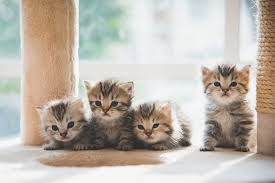

In [6]:
image_file = '/content/images.jpg'
cat_image = keras.preprocessing.image.load_img(image_file)
cat_image

In [7]:
cat_image_arr = keras.preprocessing.image.img_to_array(cat_image)
cat_image_arr

array([[[188., 208., 206.],
        [185., 205., 203.],
        [181., 201., 199.],
        ...,
        [ 83.,  61.,  47.],
        [ 79.,  60.,  45.],
        [ 76.,  57.,  42.]],

       [[187., 207., 205.],
        [182., 202., 200.],
        [175., 195., 193.],
        ...,
        [ 90.,  68.,  54.],
        [ 86.,  67.,  52.],
        [ 83.,  64.,  49.]],

       [[185., 205., 203.],
        [179., 199., 197.],
        [171., 191., 189.],
        ...,
        [100.,  78.,  64.],
        [ 96.,  77.,  62.],
        [ 93.,  74.,  59.]],

       ...,

       [[243., 243., 243.],
        [243., 243., 243.],
        [243., 243., 243.],
        ...,
        [143., 148., 154.],
        [141., 146., 150.],
        [137., 142., 146.]],

       [[242., 242., 242.],
        [242., 242., 242.],
        [242., 242., 242.],
        ...,
        [119., 122., 127.],
        [117., 120., 125.],
        [115., 116., 121.]],

       [[242., 242., 242.],
        [242., 242., 242.],
        [242., 2

In [12]:
def plot_image(original_image, updated_image):
  plt.figure(figsize = (16, 10))

  plt.subplot(1, 2, 1)  # Original image
  plt.title('Original Image')
  plt.imshow(original_image)

  plt.subplot(1, 2, 2) # Updated image
  plt.title('Updated Image')
  plt.imshow(updated_image)

  plt.show()

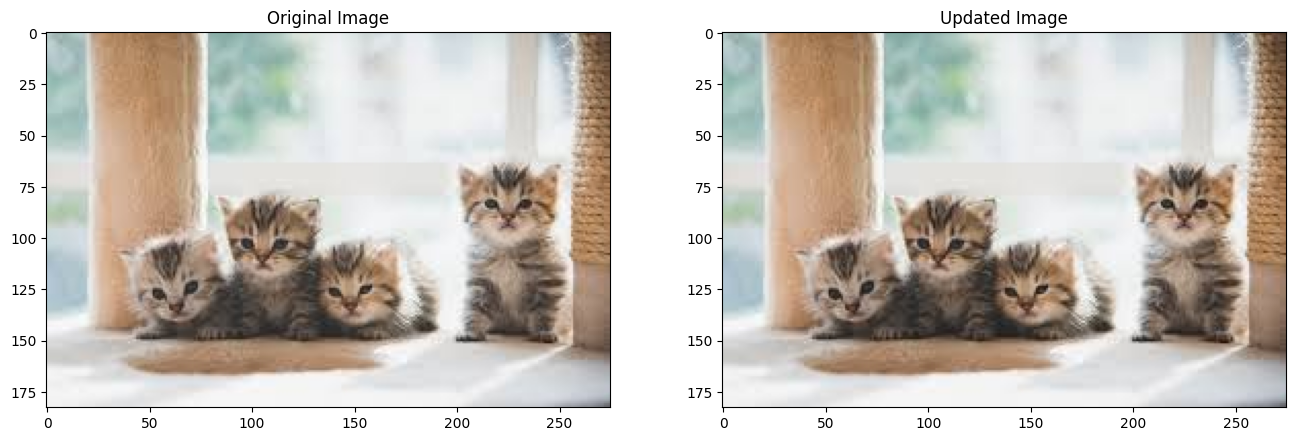

In [18]:
# Horizontal flip
updated_data = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True)
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

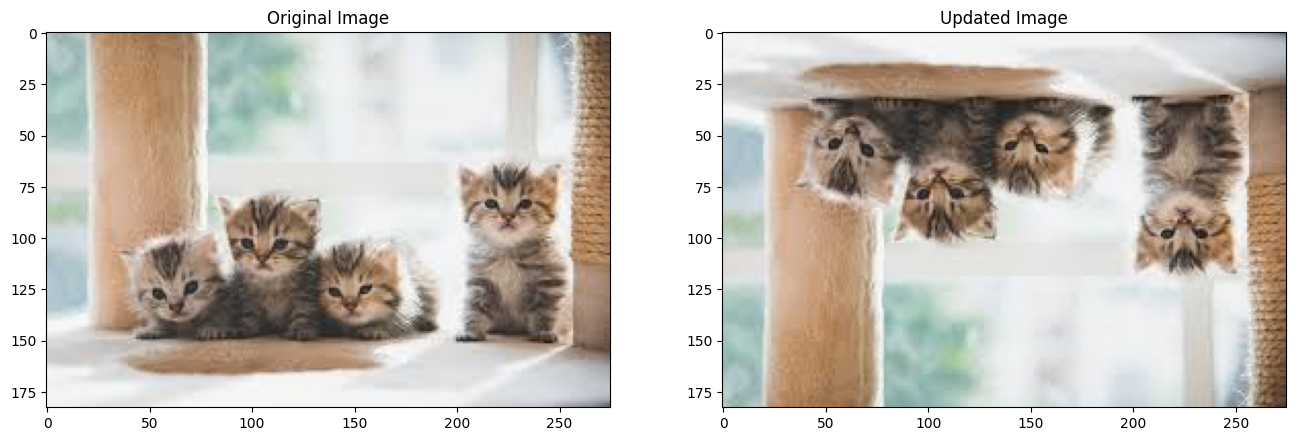

In [16]:
# Vertical flip
updated_data = keras.preprocessing.image.ImageDataGenerator(vertical_flip = True)
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

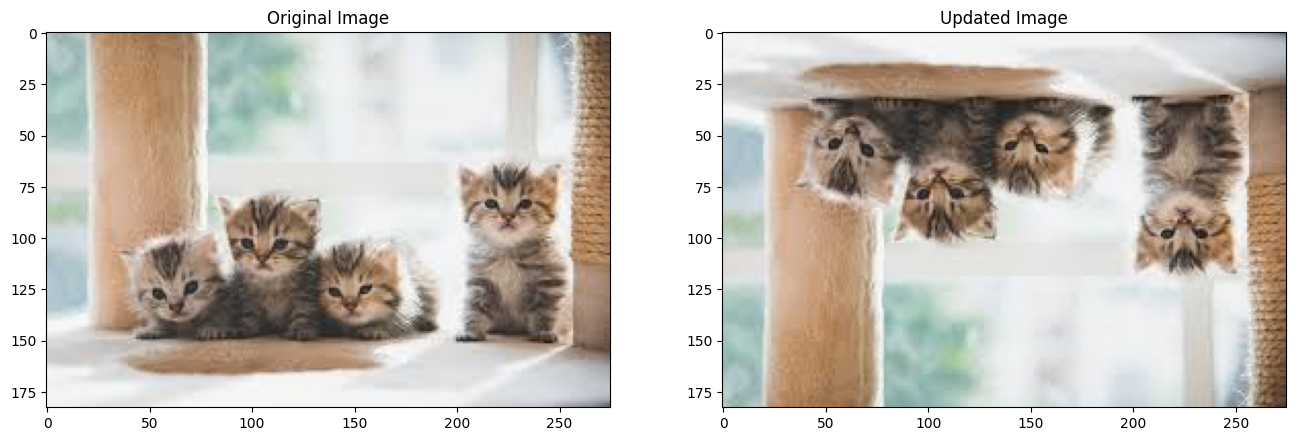

In [17]:
# Vertical and horizontal flip
updated_data = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

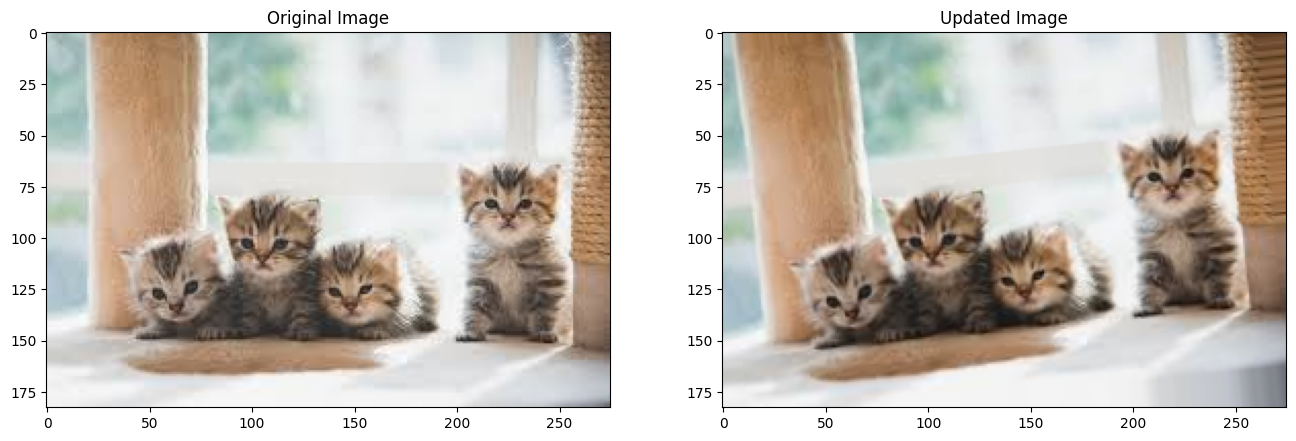

In [19]:
# Rotation
updated_data = keras.preprocessing.image.ImageDataGenerator(rotation_range = 30)
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

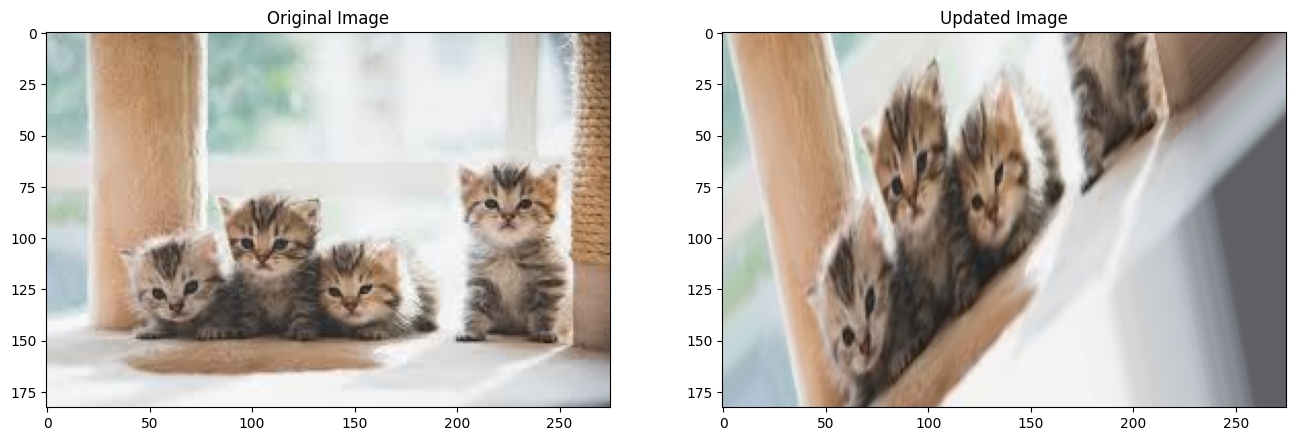

In [20]:
# Rotation and zoom
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range = [0.4, 1.6], rotation_range = 30)
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

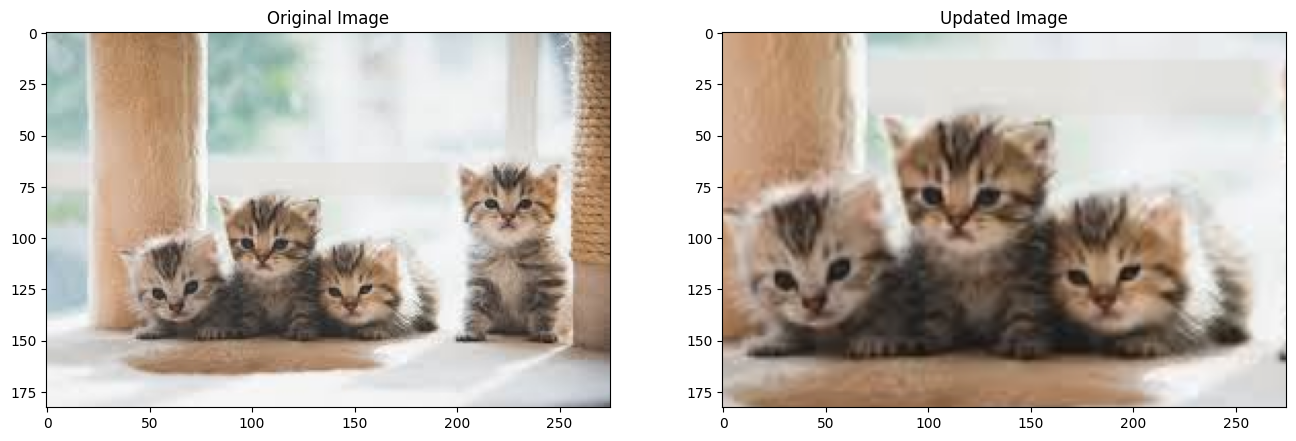

In [21]:
# Zoom
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range = [0.4, 2.5])
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

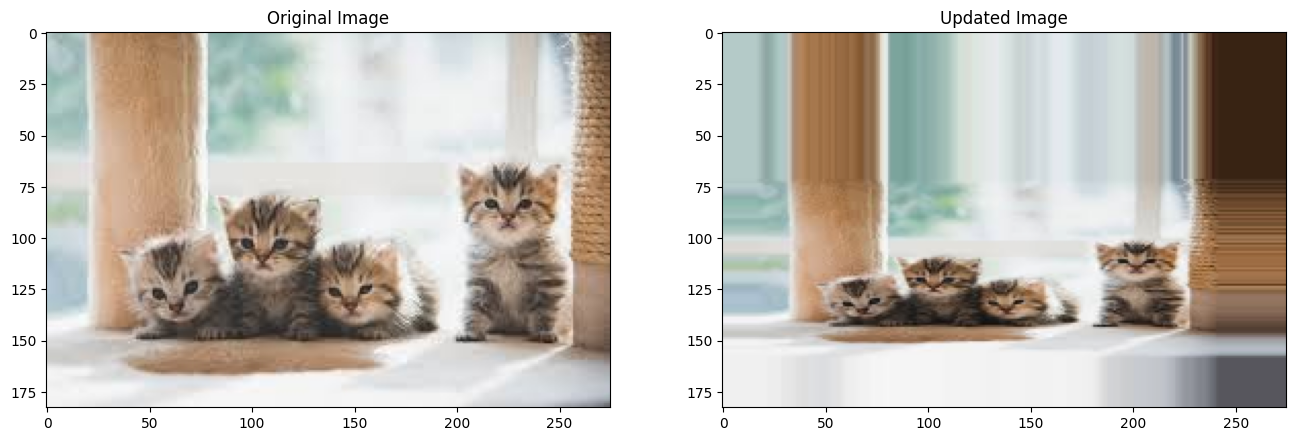

In [22]:
# Zoom
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range = [0.4, 2.5])
updated_array = updated_data.random_transform(cat_image_arr)
updated_image = keras.preprocessing.image.array_to_img(updated_array)

plot_image(cat_image, updated_image)
plt.show()

In [23]:
dataset = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                       samplewise_center=True,
                                                       featurewise_std_normalization=True,
                                                       samplewise_std_normalization=True,
                                                       zca_whitening=True,
                                                       zca_epsilon=1e-06,
                                                       rotation_range=15,
                                                       width_shift_range=0.2,
                                                       height_shift_range=0.3,
                                                       brightness_range=None,
                                                       shear_range=0.2,
                                                       zoom_range=0.2,
                                                       channel_shift_range=0.1,
                                                       fill_mode='nearest',
                                                       cval=0.0,
                                                       horizontal_flip=True,
                                                       vertical_flip=True,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format=None,
                                                       validation_split=0.0,
                                                       interpolation_order=1,
                                                       dtype=None)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [25]:
cat_image_arr.shape

(183, 275, 3)

In [29]:
cat_image_array_reshape = cat_image_arr.reshape((1,) + cat_image_arr.shape)
cat_image_array_reshape.shape

(1, 183, 275, 3)

In [31]:
directory = '/content/sample_data'
i = 0
for j in dataset.flow(cat_image_array_reshape, save_to_dir = directory,
                      save_format = 'jpg'):
  i += 1
  if i > 100:
    break

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
